Problem 1 ¶

Show that the stationary point (zero gradient) of the function

𝑓=2𝑥21−4𝑥1𝑥2+1.5𝑥22+𝑥2

is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. 
Hint: Use Taylor's expansion at the saddle point. Find directions that reduce 𝑓.


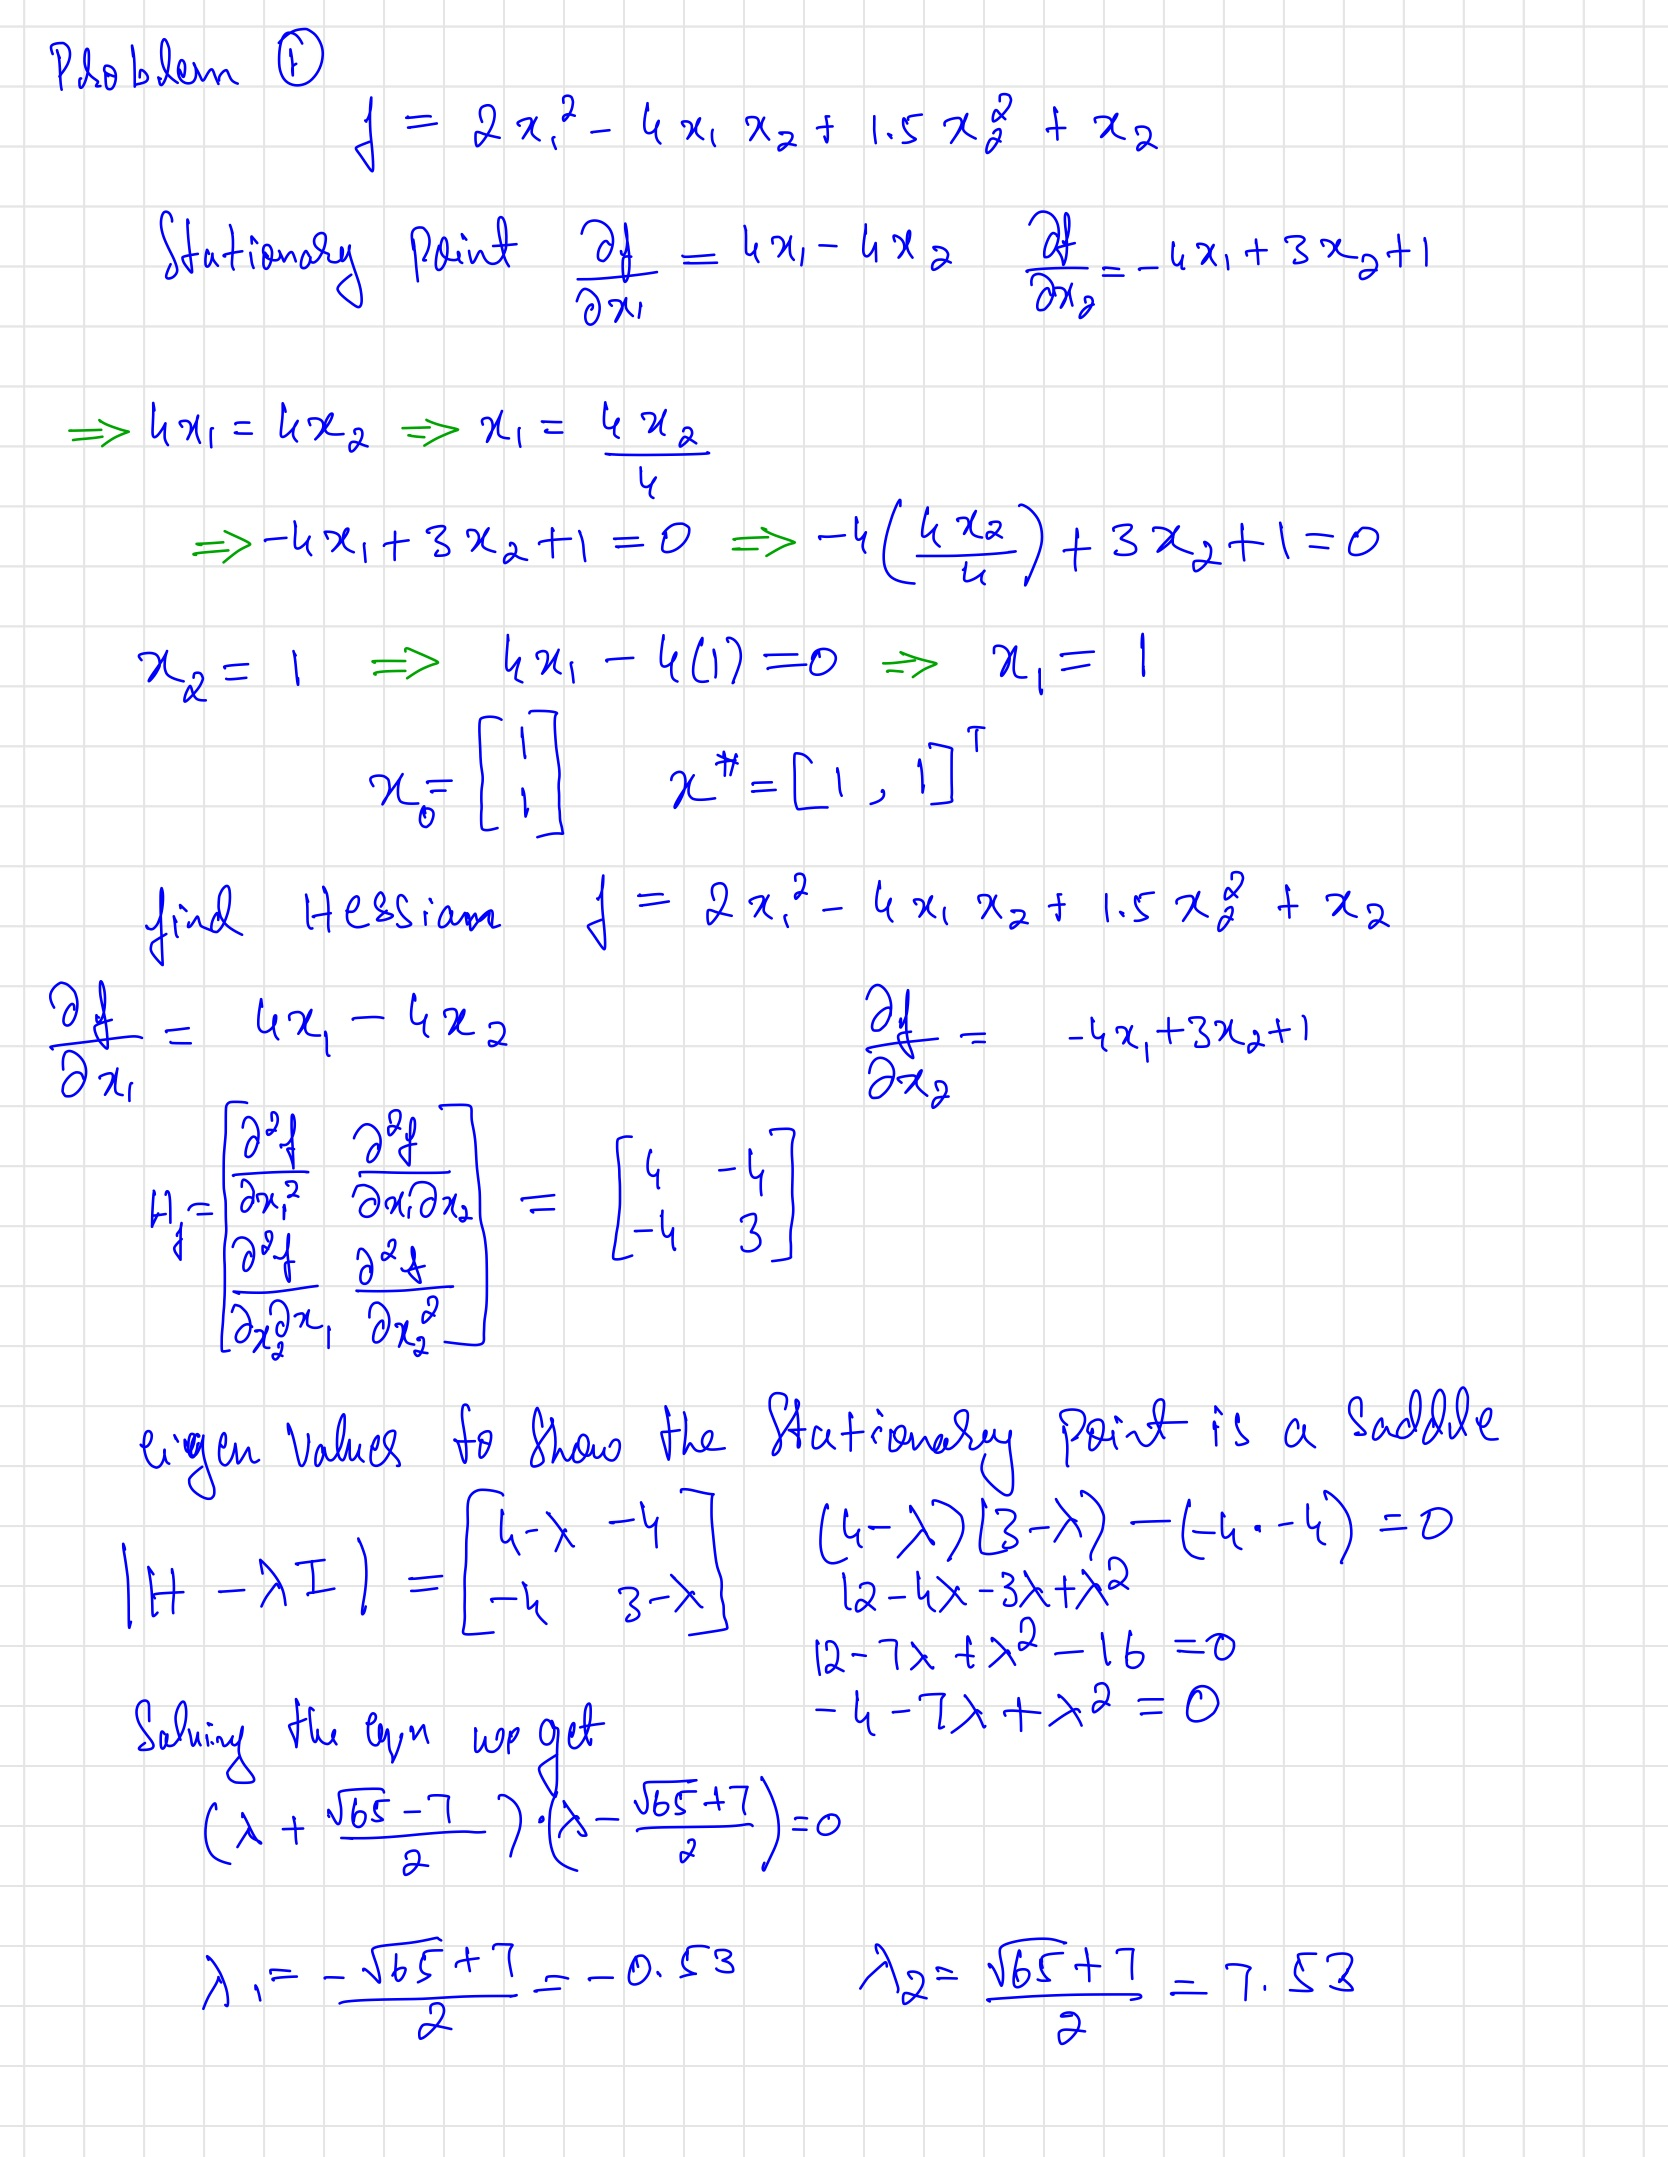


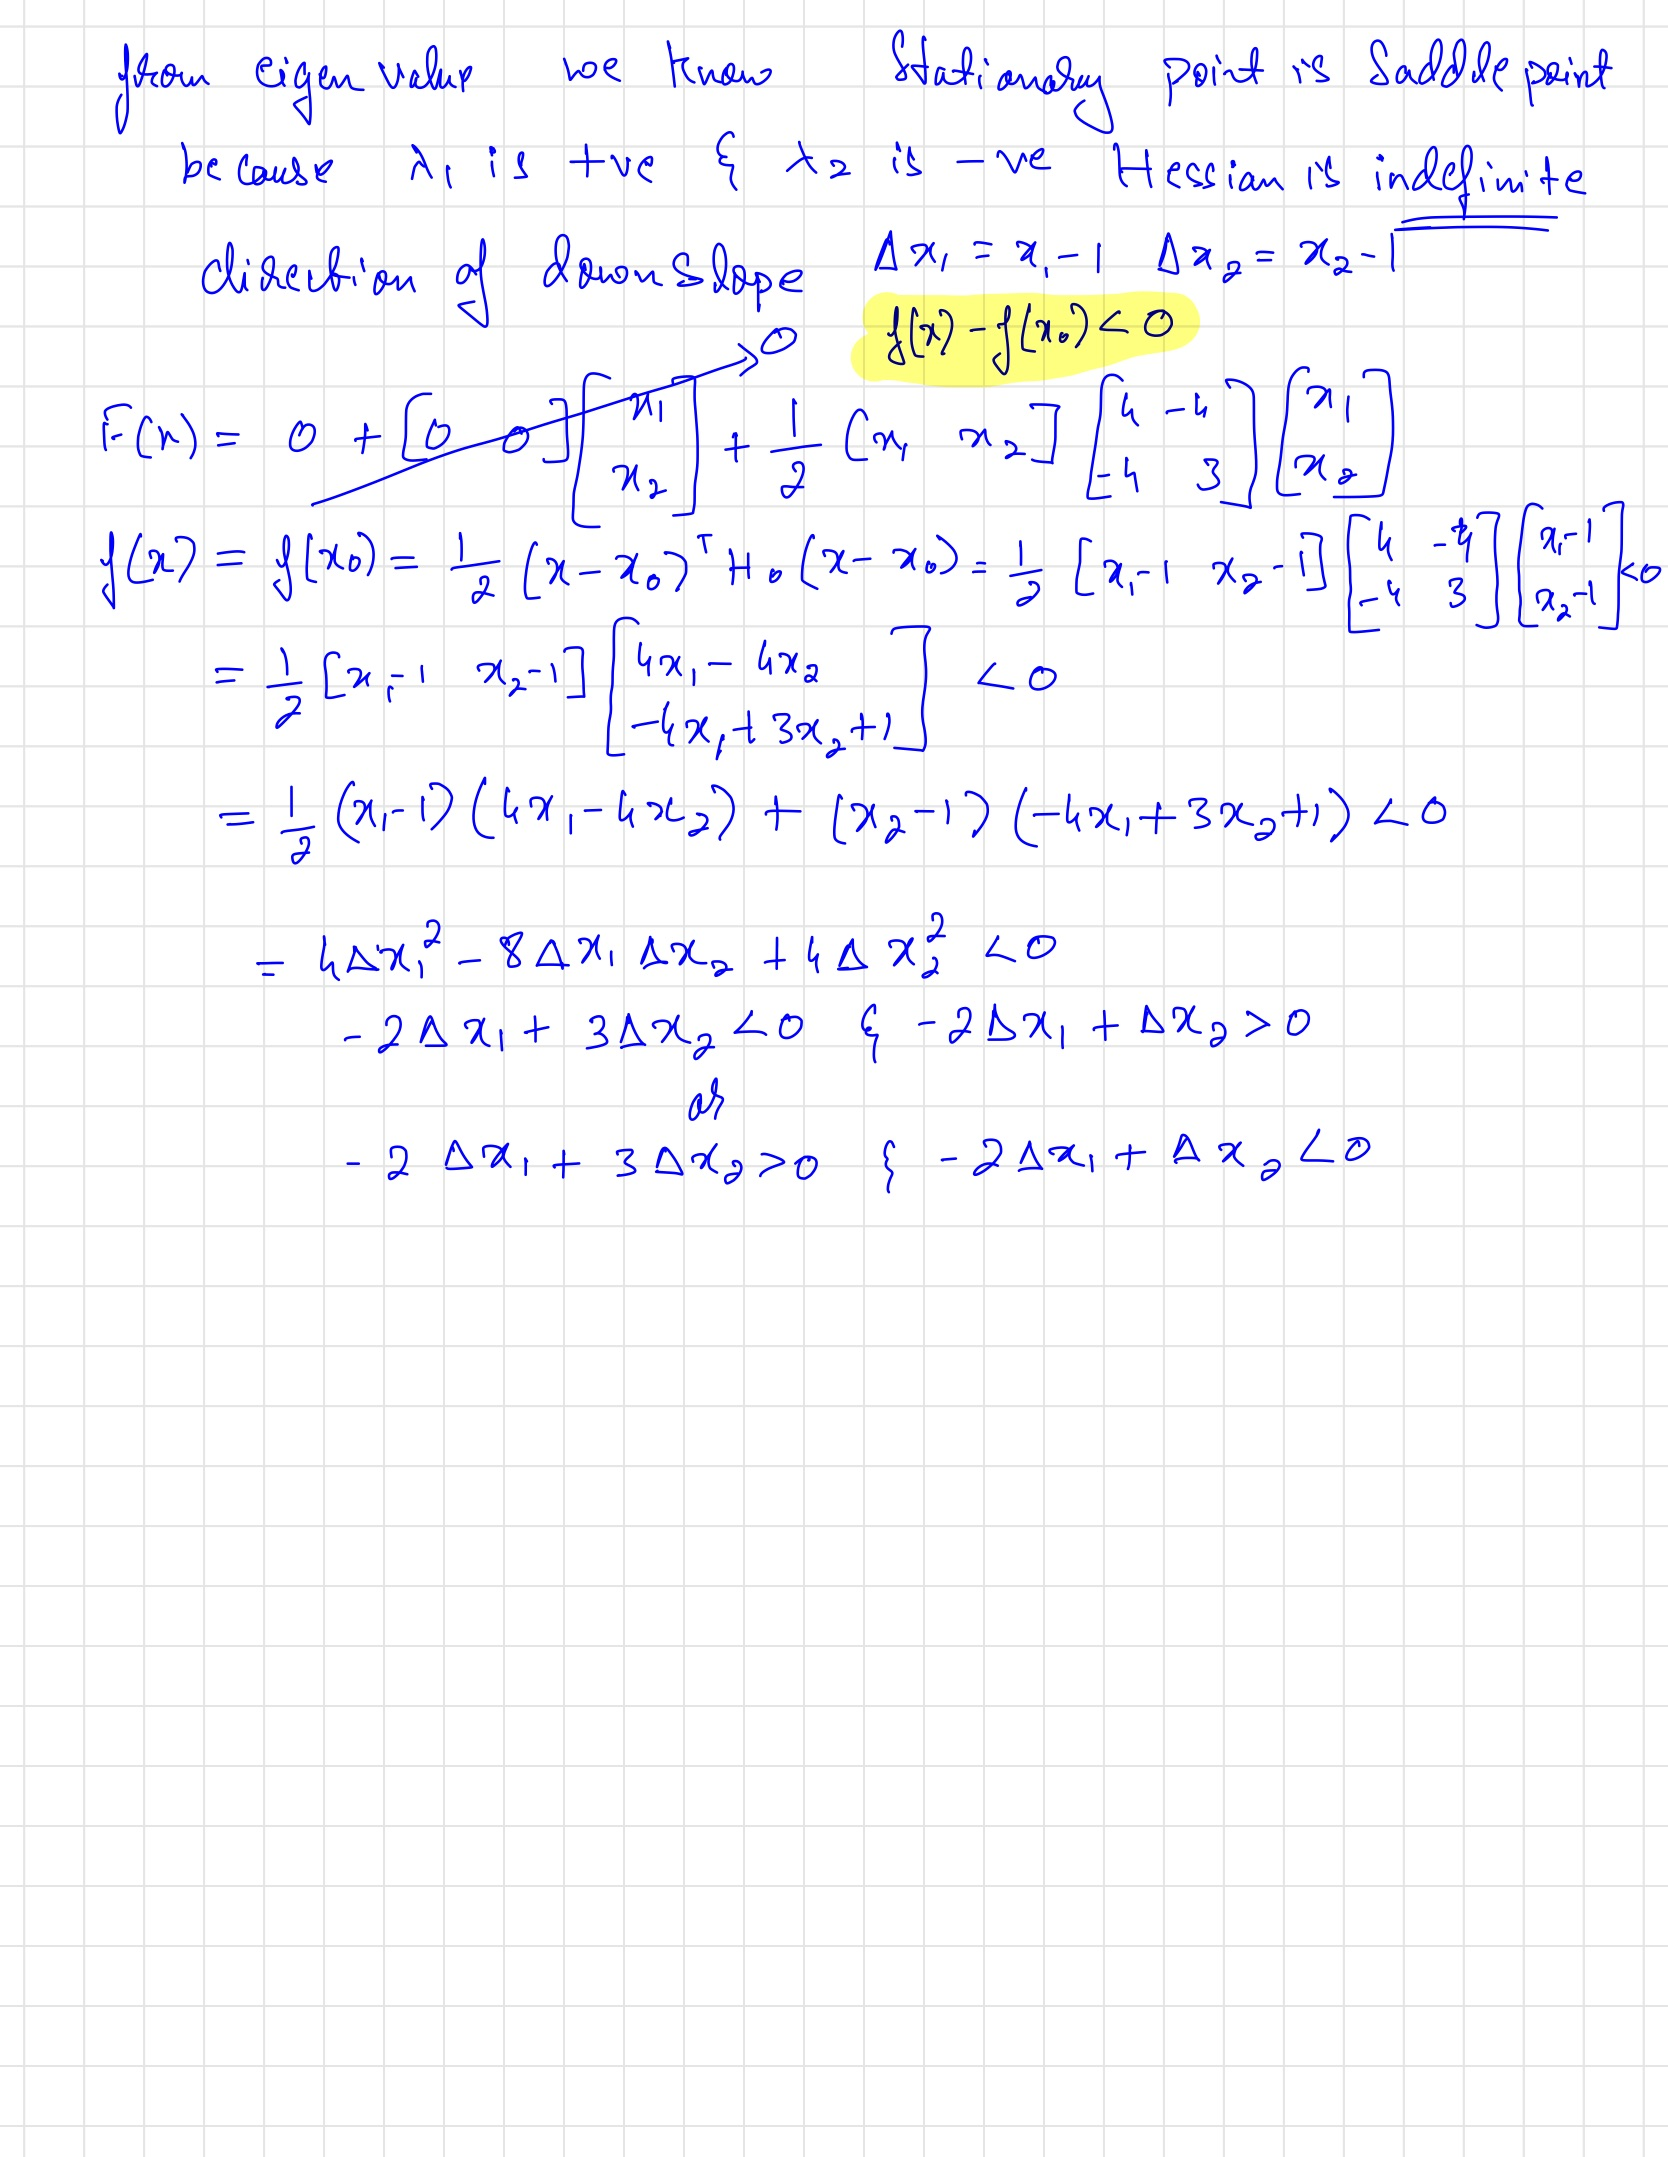

### Problem 2 (50 points) 

2a - Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.


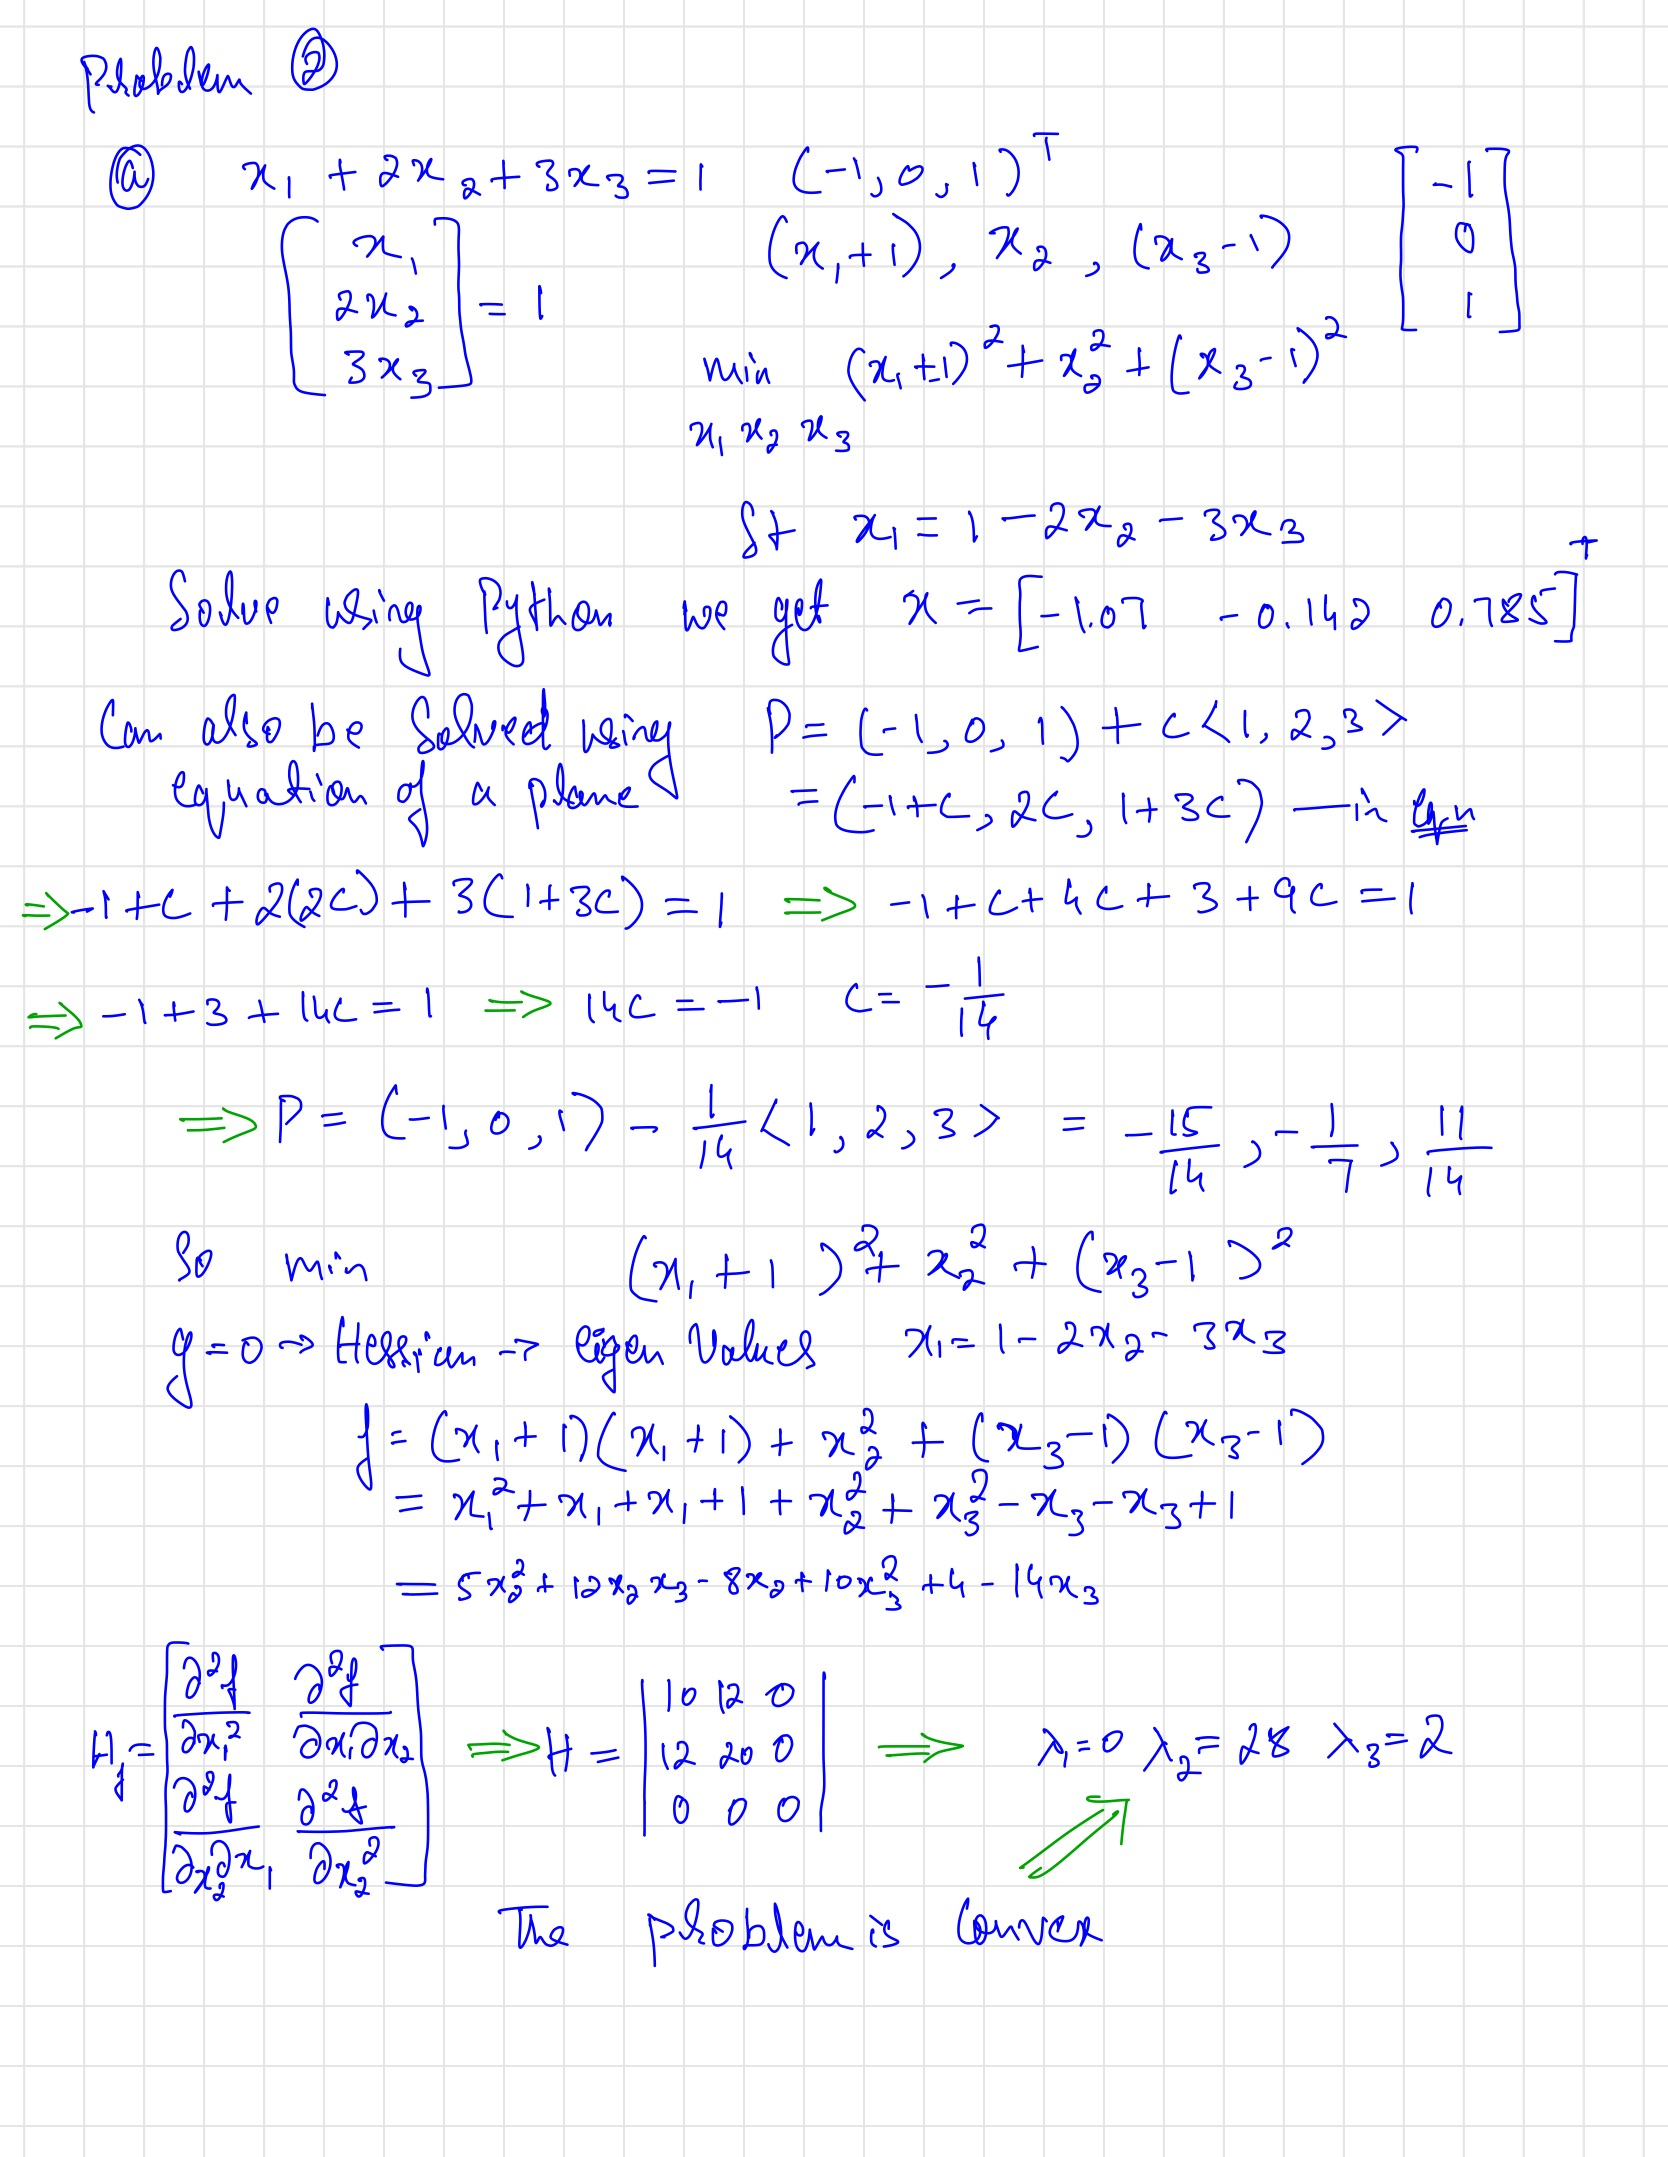

In [4]:
# code for 2a
from scipy.optimize import minimize
fun = lambda x: (x[0]+1)**2 + (x[1])**2 + (x[2] - 1)**2
cons = ({'type':'eq', 'fun':lambda x: x[0]+2*x[1]+3*x[2]-1})
# bnds = ((-1,1),(-1,1),(-1,1))
# res = minimize(fun,(-1,0,1),method='SLSQP',bounds=bnds, constraints = cons)
res = minimize(fun,(-1,0,1),method='SLSQP', constraints = cons)
res

     fun: 0.07142857142857141
     jac: array([-0.14285713, -0.28571427, -0.42857141])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-1.07142857, -0.14285714,  0.78571429])

2b - Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.


Initial points tested = (0,0), (1,1), (1.5,1) and (2,1)

[(2, 1),
 array([1.76, 0.7 ]),
 array([1.58  , 0.4888]),
 array([1.443344, 0.34144 ]),
 array([1.3380368 , 0.23995072]),
 array([1.25543903, 0.17139616]),
 array([1.18932759, 0.12646424]),
 array([1.13521912, 0.09845208]),
 array([1.08988296, 0.08253537]),
 array([1.05099042, 0.07524234]),
 array([1.0168623 , 0.07407502]),
 array([0.98628706, 0.07723654]),
 array([0.95838997, 0.08343479]),
 array([0.9325388 , 0.09174103]),
 array([0.908276  , 0.10148817]),
 array([0.88526982, 0.11219742]),
 array([0.86327914, 0.12352556]),
 array([0.84212816, 0.13522695]),
 array([0.82168811, 0.14712618]),
 array([0.80186416, 0.15909837]),
 array([0.78258594, 0.171055  ]),
 array([0.76380075, 0.18293368]),
 array([0.74546863, 0.19469086]),
 array([0.72755886, 0.20629645]),
 array([0.7100474, 0.2177301]),
 array([0.69291505, 0.22897839]),
 array([0.67614614, 0.2400329 ]),
 array([0.65972758, 0.25088879]),
 array([0.64364817, 0.26154372]),
 array([0.6278981, 0.2719972]),
 array([0.61246863, 0.28224998]),

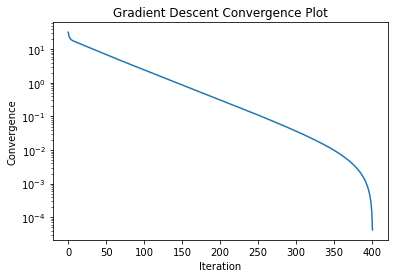

In [65]:
# Code for Gradient descent
import numpy as np
import scipy
from scipy.optimize import optimize
import matplotlib.pyplot as plt

def f(x):
    return 5 * x[0] ** 2 + 12 * x[0] * x[1] - 8 * x[1] + 10 * x[1] ** 2 - 14 * x[1] + 4

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 12 * x[0] + 20 * x[1] - 14])

eps = 1e-3
x0 = (2, 1)
k = 0
soln = [x0]
x = soln[k]
error = scipy.linalg.norm(grad(x))
a = 0.01
xs = [-0.14244893,  0.78544215]
py = []

while error >= eps:
    x = x - a * grad(x)
    soln.append(x)
    error = scipy.linalg.norm(grad(x))
    ans = f(x)
    y = abs(f(x) - f(xs))
    py.append(float(y))
    
plt.plot(py)
plt.title("Gradient Descent Convergence Plot")
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.yscale("log")
soln

Initial points tested = (0,0), (-1,1), (0,-1) and (2,-1.5)

In [ ]:
# Code for Newton's algorithm
import numpy as np
import scipy
from scipy.optimize import optimize
import matplotlib.pyplot as plt

def f(x):
    return 5 * x[0] ** 2 + 12 * x[0] * x[1] - 8 * x[1] + 10 * x[1] ** 2 - 14 * x[1] + 4

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 12 * x[0] + 20 * x[1] - 14])

H = np.array([[10, 12],[12, 20]])
# H = [[10, 12, 0],[12, 20, 0], [0, 0, 0]]
eps = 1e-3
x0 = (-1,1)
k = 0
soln = [x0]
x = soln[k]
xs = [-0.14244893,  0.78544215]
py = []

error = scipy.linalg.norm(grad(x))
a = 1

# line search code starts here

def line_search(x):
    a = 1
    d = -  np.matmul(np.linalg.inv(H), grad(x))
    def phi(a, x):
        return f(x) - a * 0.8 * np.matmul(np.transpose(grad(x)), d)
    while phi(a, x) < f(x + a * d):
        a = 0.5 * a
    return a
np.linalg.inv(H)

while error >= eps:
    a = line_search(x)
    x = x - a * np.matmul(np.linalg.inv(H), grad(x))
    soln.append(x)
    ans = f(x)
    y = abs(f(x) - f(xs))
    py.append(float(y))
    error = scipy.linalg.norm(grad(x))
    

plt.plot(py)
plt.title("Newton's Algorithm Convergence Plot")
plt.xlabel("Iteration")
plt.ylabel("Convergence")
plt.yscale("log")
soln

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$.

3a - Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 

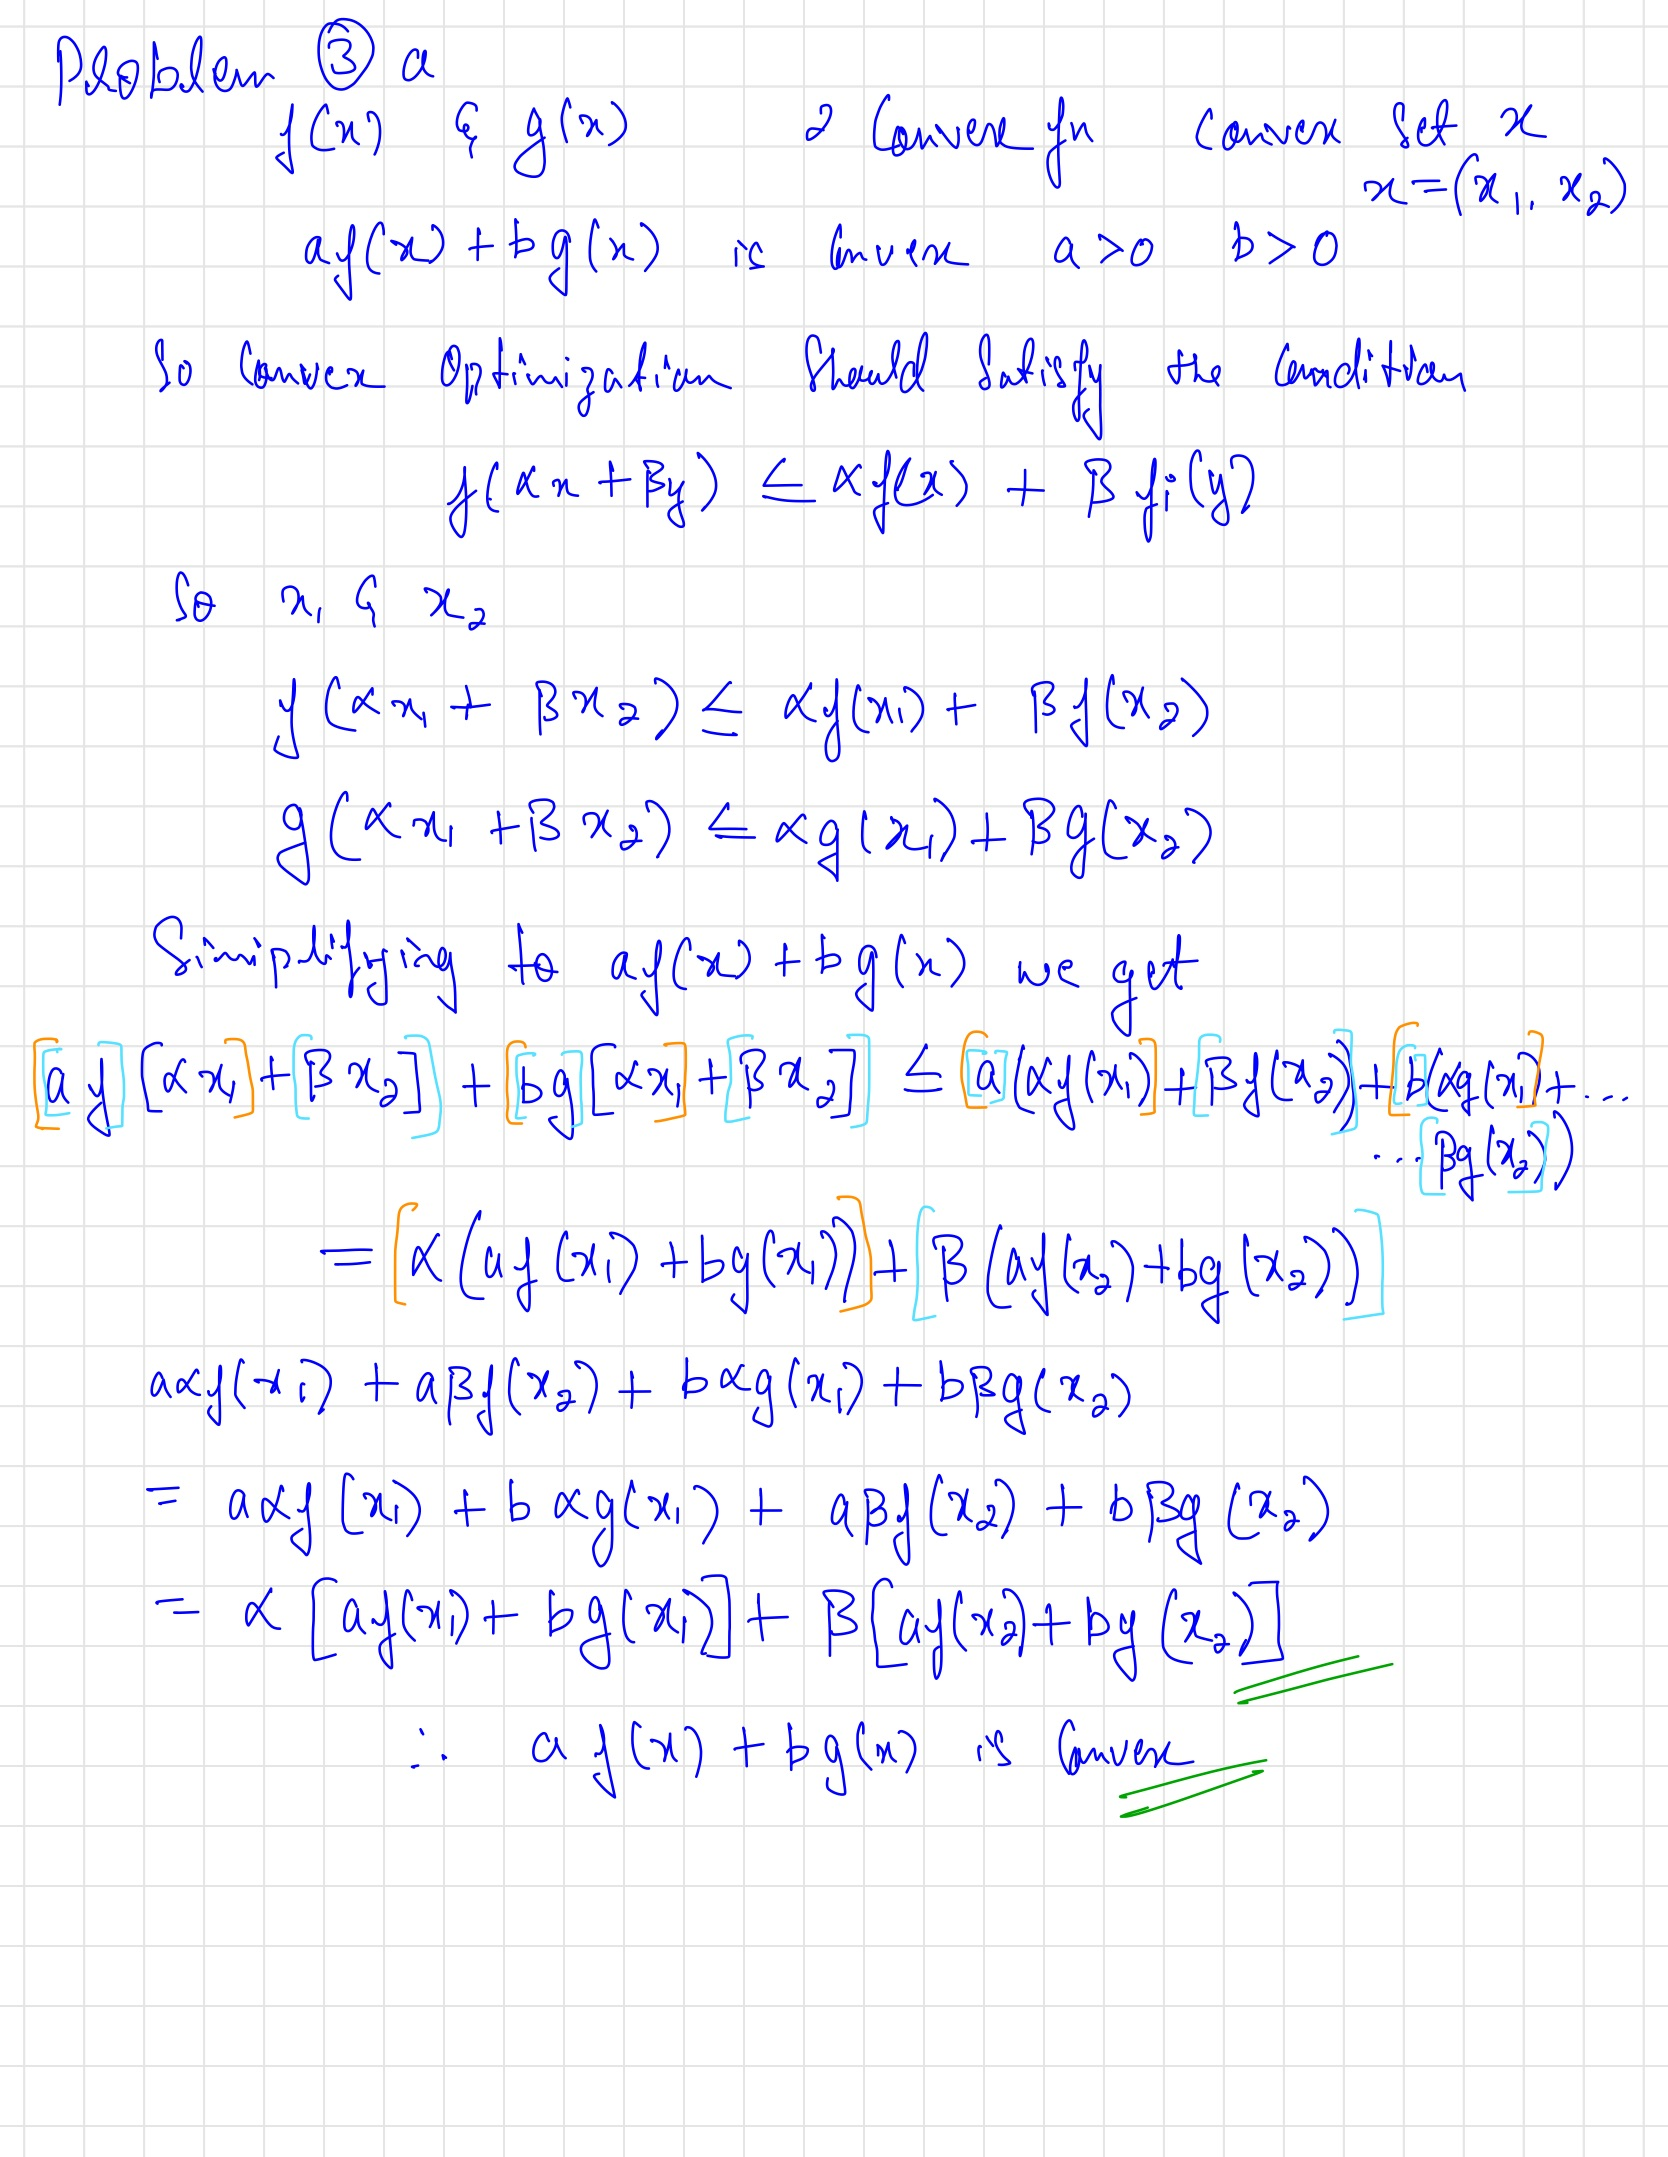

3b - In what conditions will $f(g(x))$ be convex?

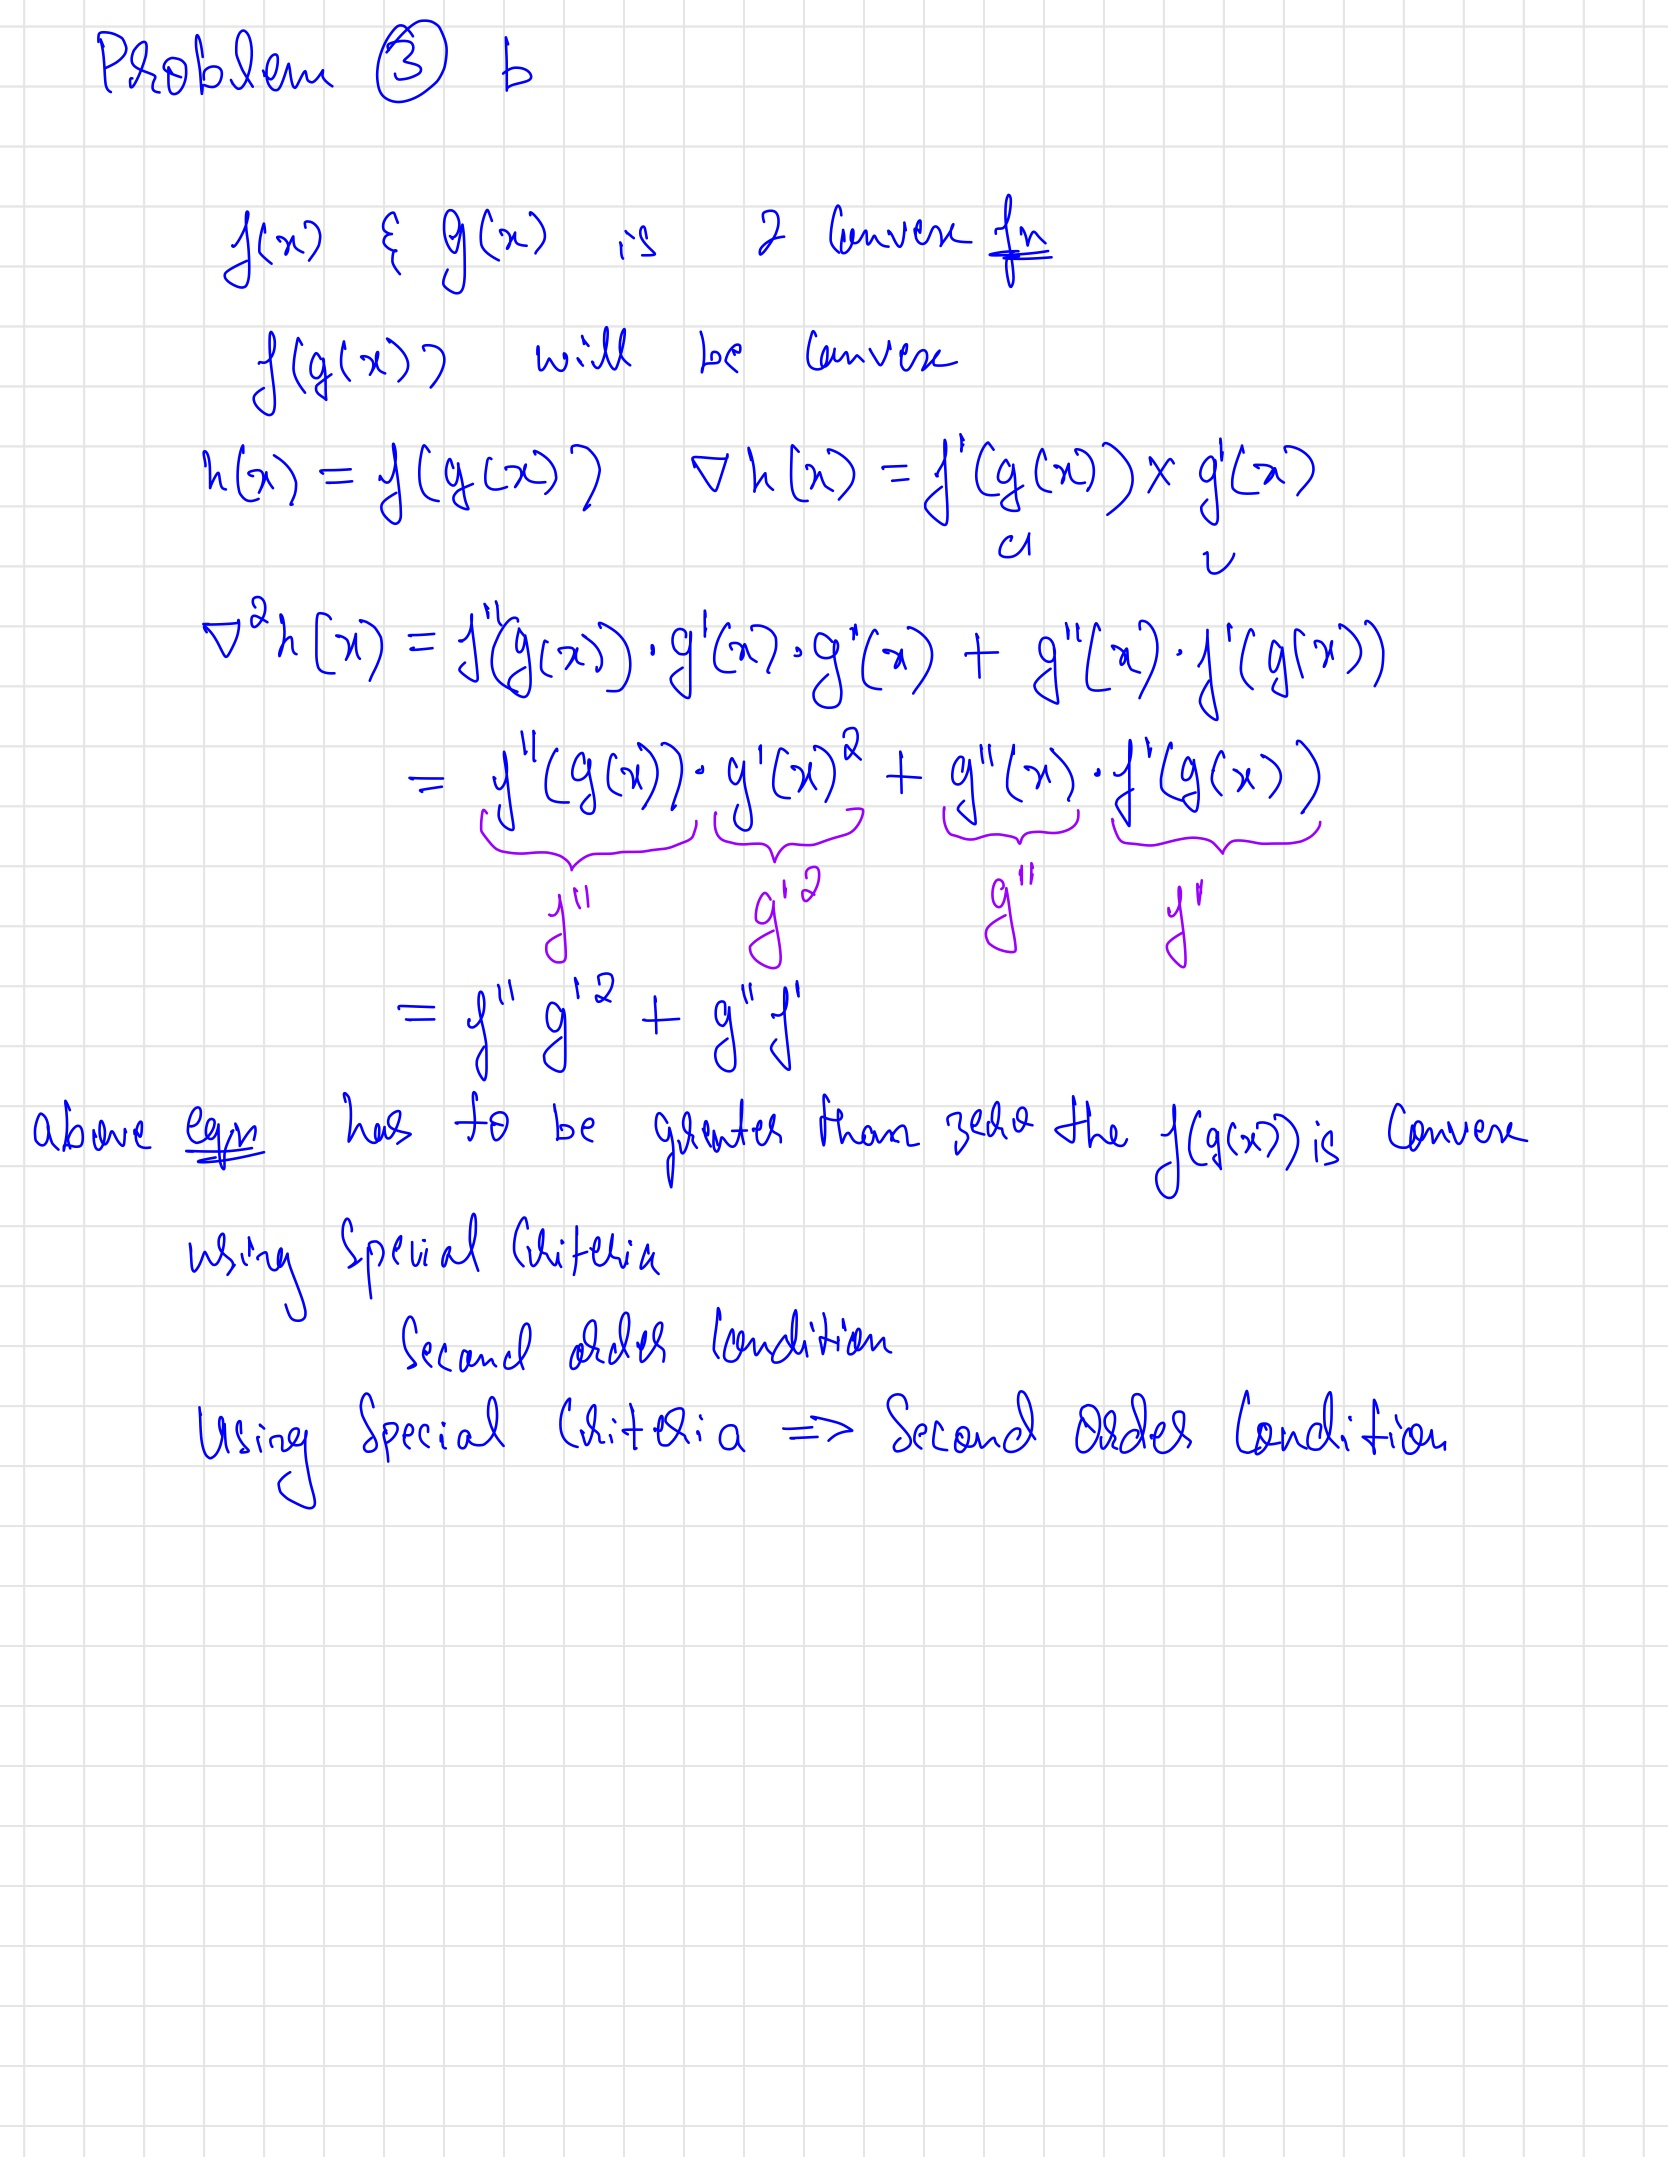


### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) + 
    \textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$. 
    

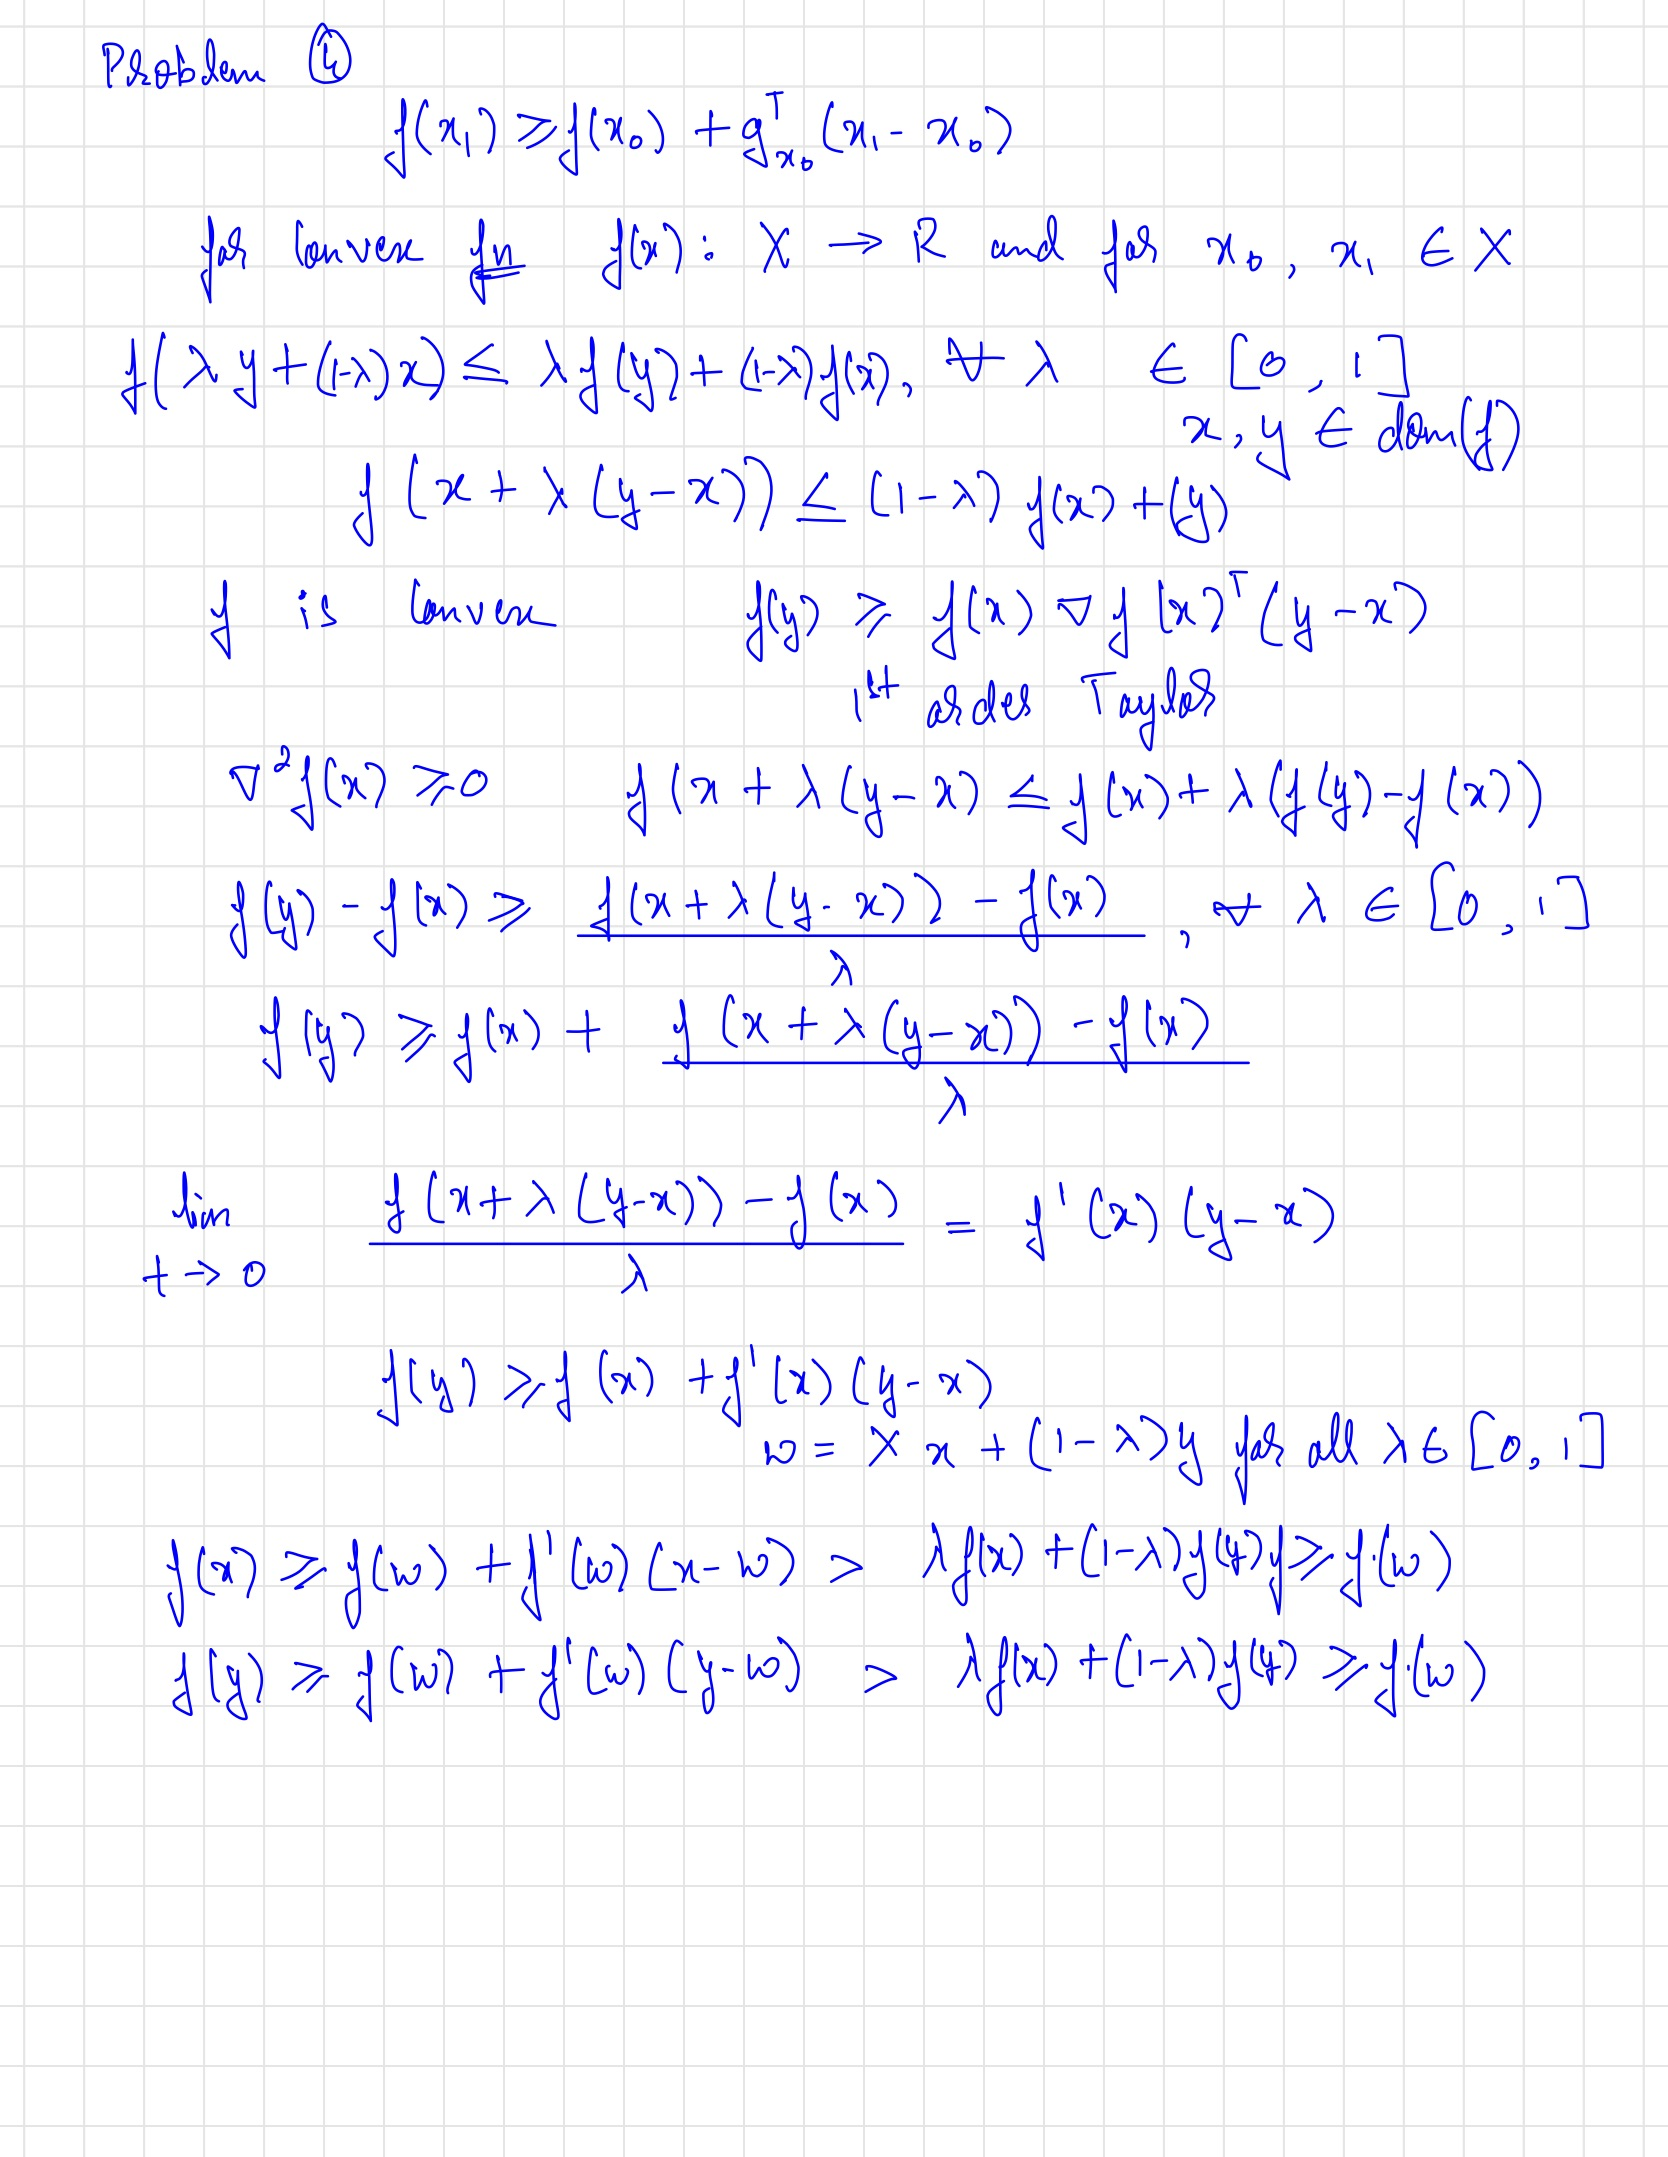

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.


5a - Formulate this problem as an optimization problem. 

5b - Is your problem convex?

5c - If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?

5d - If we require no more than half of the lamps to be switched on, will the problem have a unique solution?